# Chocolate Scraping with Beautiful Soup 

There's a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in this review guide. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?

We will find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas

### Importing the modules

In [93]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Parsing the site

In [94]:
site = requests.get(
    'https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')\

soup = BeautifulSoup(site.content, 'html.parser')

### How are ratings distributed?

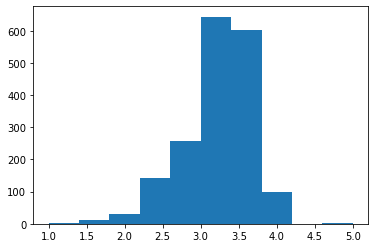

In [95]:
#making a list with all the ratings
ratings = [
    float(i.get_text()) for i in soup.select('.Rating')
    if i.get_text() != 'Rating'
]

#making an histogram with the ratings
plt.hist(ratings)
plt.show()


### Which chocolatier makes the best chocolate?
Printing the Top 10 best Rated Companies and their Average Ratings

In [98]:
companies = [i.get_text() for i in soup.select('.Company')]
companies.remove(companies[0])

#making a DataFrame with the company names and the ratings
df = pd.DataFrame({'Company': companies, 'Ratings': ratings})

#Getting tha mean value of the ratings and getting the top 10 best chocolatiers
mean_vals = df.groupby("Company").Ratings.mean()
ten_best = mean_vals.nlargest(10)
ten_best

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64

### Is more cacao better?
We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao.

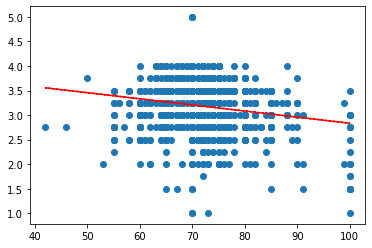

<Figure size 432x288 with 0 Axes>

In [97]:
#Getting all the cocoa percentages
percentage_data = [i for i in soup.select('.CocoaPercent')]
percentage_data.remove(percentage_data[0])
cocoa_percents = [int(float(i.get_text().strip('%'))) for i in percentage_data]

# Adding the CocoaPercentage column to the dataframe with the Cocoa Percentages values
df['CocoaPercentage'] = cocoa_percents


#Make a scatterplot of ratings vs percentage of cocoa 
plt.scatter(df.CocoaPercentage, df.Ratings)

z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")

plt.show()
plt.clf()